<a href="https://colab.research.google.com/github/Atharvnam/Codsoft-Internship/blob/main/Codsoft_DataScience_Task_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task : 2  Movie Rating Prediction With Python

Batch : A24

Domain : Data Science

# Task : MOVIE RATING PREDICTION WITH PYTHON



*   Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
*   The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately



Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read The Data

In [2]:
movie_data = pd.read_csv('/content/IMDb Movies India.csv',encoding='unicode_escape')
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movie_data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Data Cleaning

In [7]:
#check null/missing values in data
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
movie_data.dropna(subset=["Rating"], inplace = True)

In [9]:
movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [10]:
movie_data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

Convert votes to integer and remove commas

In [11]:
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)

Convert year (1988) to 1988

In [12]:
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

Remove min from duration columns

In [13]:
movie_data['Duration'] = movie_data['Duration'].str.strip('min')

In [14]:
# We Will Fill Null Values With Median.
movie_data['Duration'].fillna(movie_data['Duration'].median(),inplace=True)

In [15]:
#Last check null values in dataset
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [17]:
movie_data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15501,Zulm Ki Hukumat,1992,135.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


# Hence,  Data is Cleaned

# EDA (Exploratory data Analysis)

Top 10 Movies

In [18]:
# find top 10 movies based on rating
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


Distribution of top 10 movies with respect to year

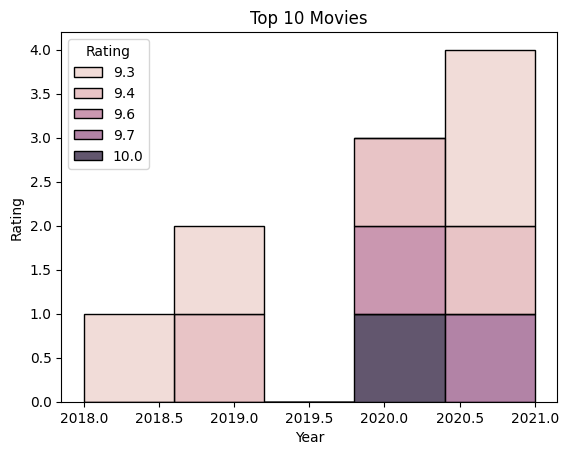

In [19]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Top 10 Movies')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Distribution of Genre of movies

In [20]:
# Select the top N genres (e.g., top 5)
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291


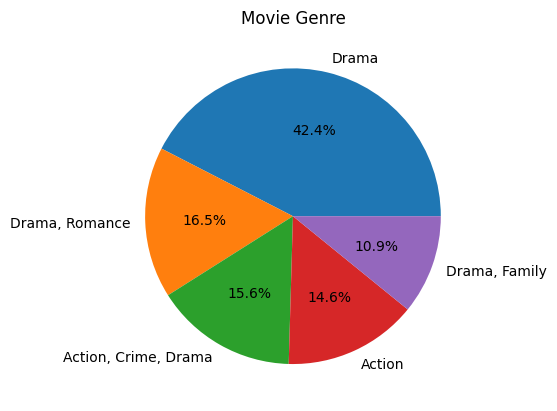

In [21]:
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%')
plt.title('Movie Genre')
plt.show()

Distribution of top directors by average rating

In [22]:
# Group the data by director and calculate the average rating
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)
top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


<ipython-input-23-97ea2646fedc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='Rating', y='Director', palette='rocket')


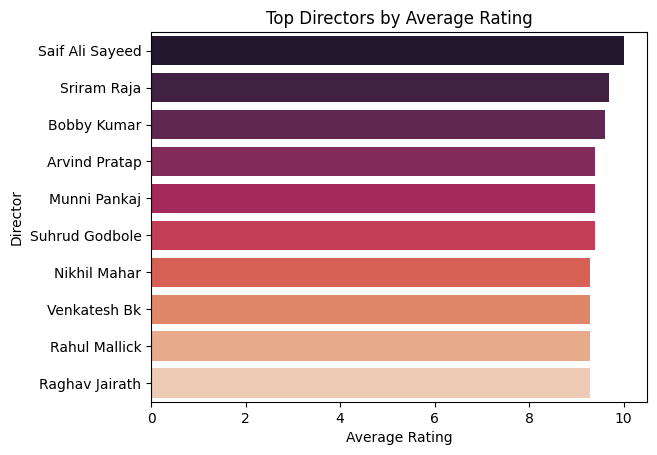

In [23]:
sns.barplot(data=top_directors, x='Rating', y='Director', palette='rocket')
plt.title('Top Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

Relationship between the number of votes and movie ratings

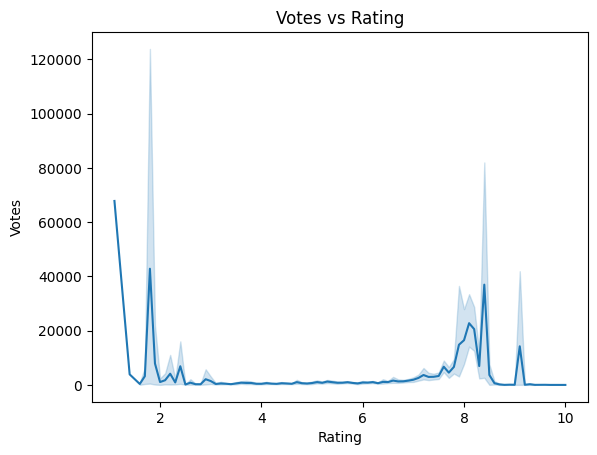

In [24]:
sns.lineplot(data=movie_data, x='Rating', y='Votes')
plt.title('Votes vs Rating')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

Distribution of top actors by number of movie

In [25]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']
top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


<ipython-input-26-4067f87829e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n_actors, x='MovieCount', y='Actor',palette='crest')


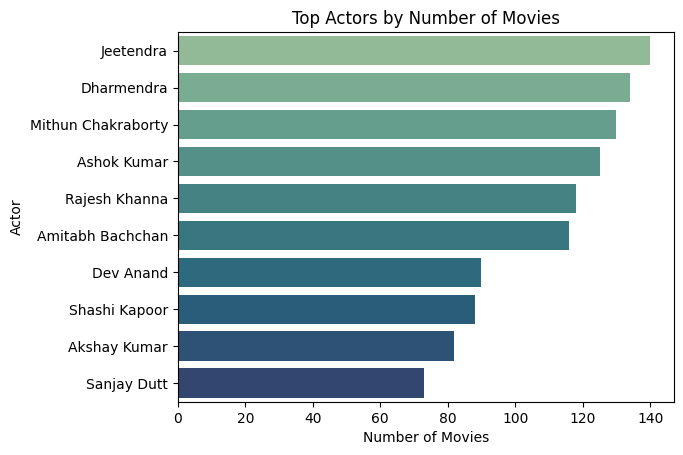

In [26]:
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor',palette='crest')
plt.title('Top Actors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

Distribution of number of movie released every year

In [27]:
yearly_movie_counts = movie_data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']
yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,1917,1
88,1931,3
89,1932,2
86,1933,4
90,1934,2
...,...,...
1,2017,223
2,2018,214
0,2019,238
9,2020,157


<ipython-input-28-cf4e6d98edc0>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount',palette='flare')


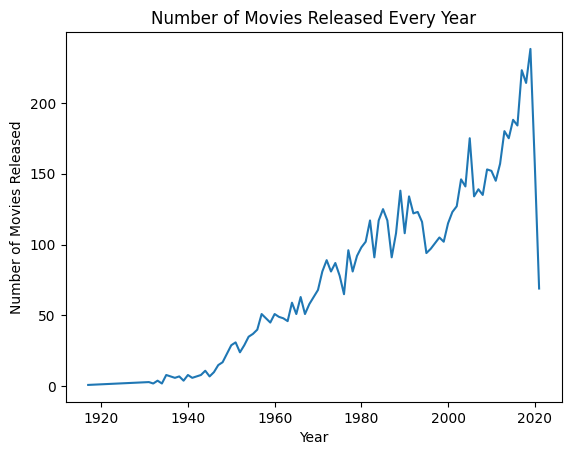

In [28]:
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount',palette='flare')
plt.title('Number of Movies Released Every Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()

Distribution of Movies with rating greater than 8 and votes greater than 10000

In [29]:
filtered_df = movie_data[(movie_data['Rating'] > 8) & (movie_data['Votes'] > 10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


<ipython-input-30-7a61a6d27dd2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


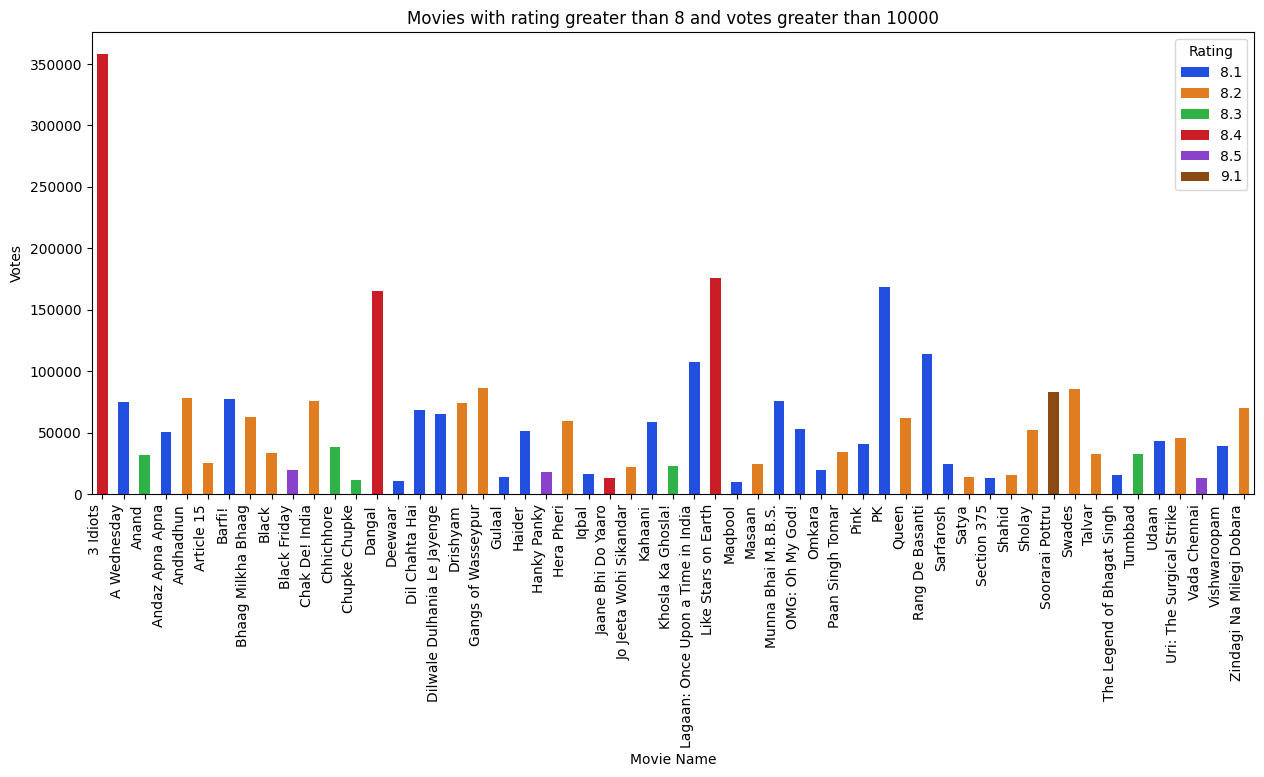

In [30]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')
plt.show()

Distribution of Durations of movies by years

In [31]:
movie_data['Duration'] = movie_data['Duration'].astype(int)
movie_data['Year'] = movie_data['Year'].astype(int)

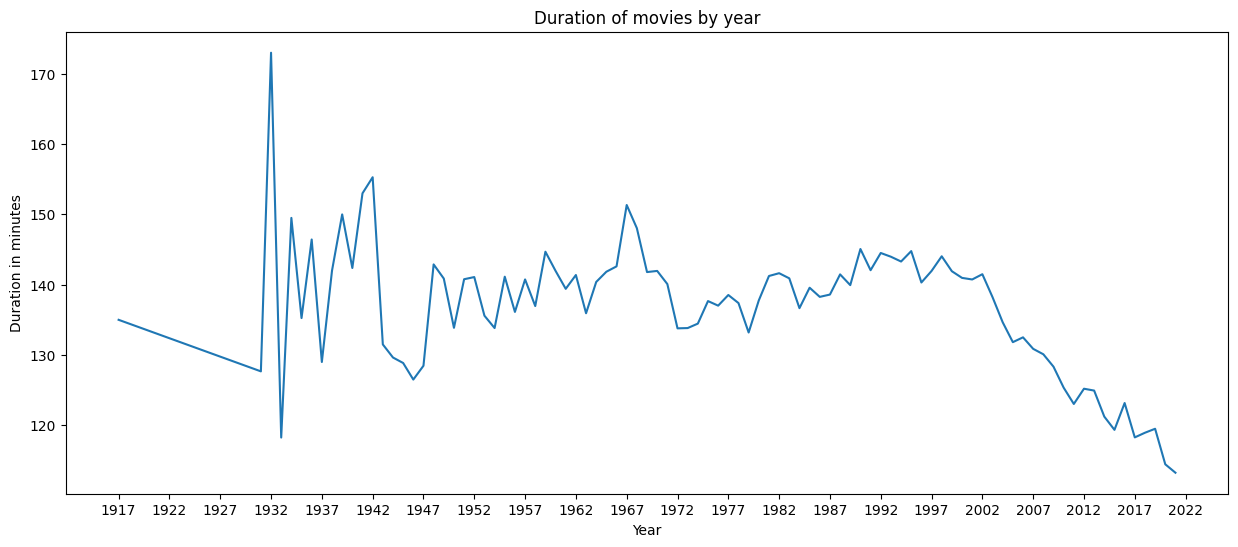

In [32]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=movie_data,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

Distribution of Number of movies each genre

In [33]:
# Create a new DataFrame with one row for each genre
movie_data['Genre'] = movie_data['Genre'].str.split(',')
genre_df = movie_data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


<ipython-input-34-04598b22846b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='rocket')


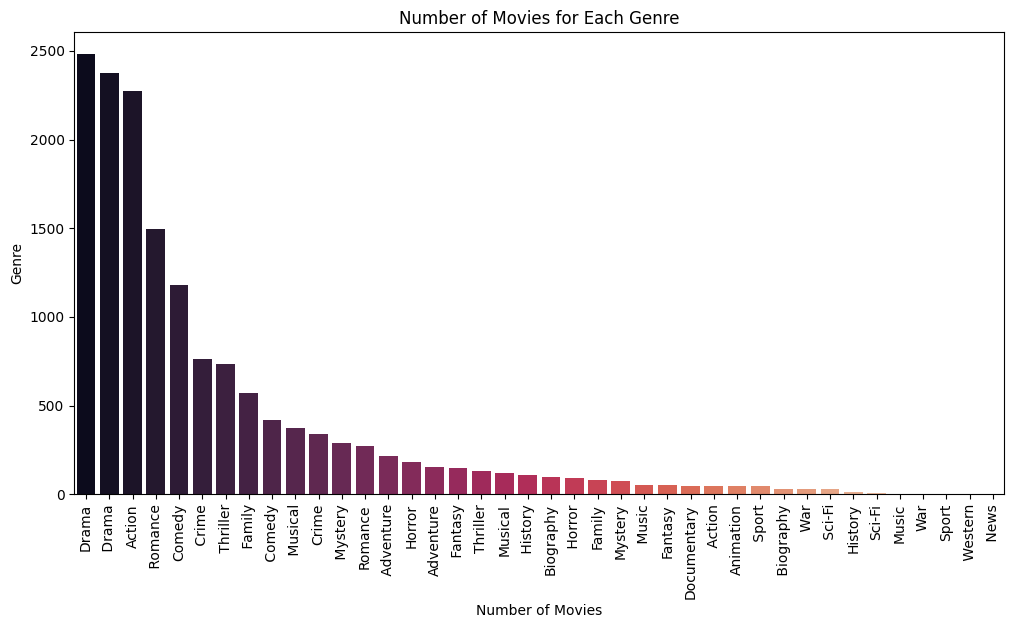

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='rocket')
plt.title('Number of Movies for Each Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.show()

Distribution of Average rating of movies in each genre

<ipython-input-35-28c011d178db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='viridis')


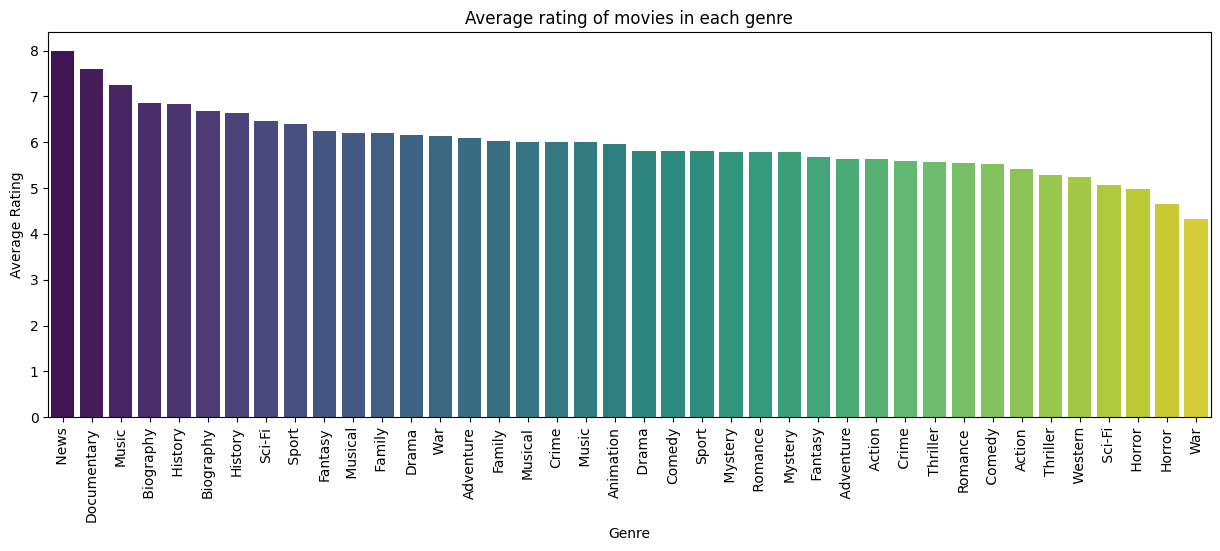

In [35]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
trans_data = movie_data.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(movie_data['Director'])
# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(movie_data['Actor 3'])
trans_data['Genre'] = labelencoder.fit_transform(movie_data['Genre'].apply(lambda x: ', '.join(x)))
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


<Axes: >

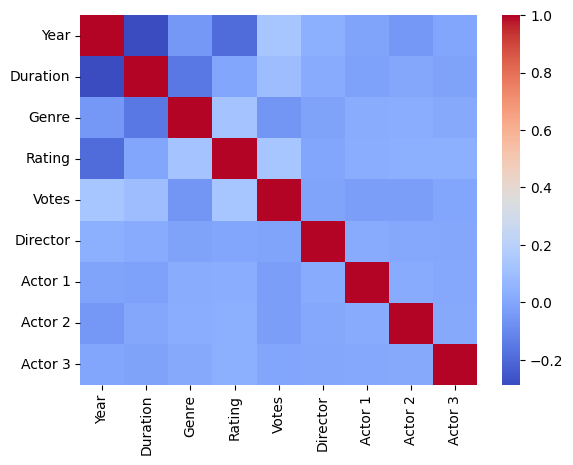

In [37]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

Model Building

In [38]:
# Import modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
X_test = np.array(X_test)

In [41]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.38173569, 6.27438422, 6.24148256, ..., 5.6990634 , 6.25823896,
       6.09526622])

In [42]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.0848334767203478
Mean squared error:  1.6972873264362005
Mean absolute error:  1.0286370452288052


In [43]:
print(y_test)

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
14566    3.5
10966    5.2
10168    2.7
14796    4.9
2785     8.0
Name: Rating, Length: 2268, dtype: float64
